# Google Inception module

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

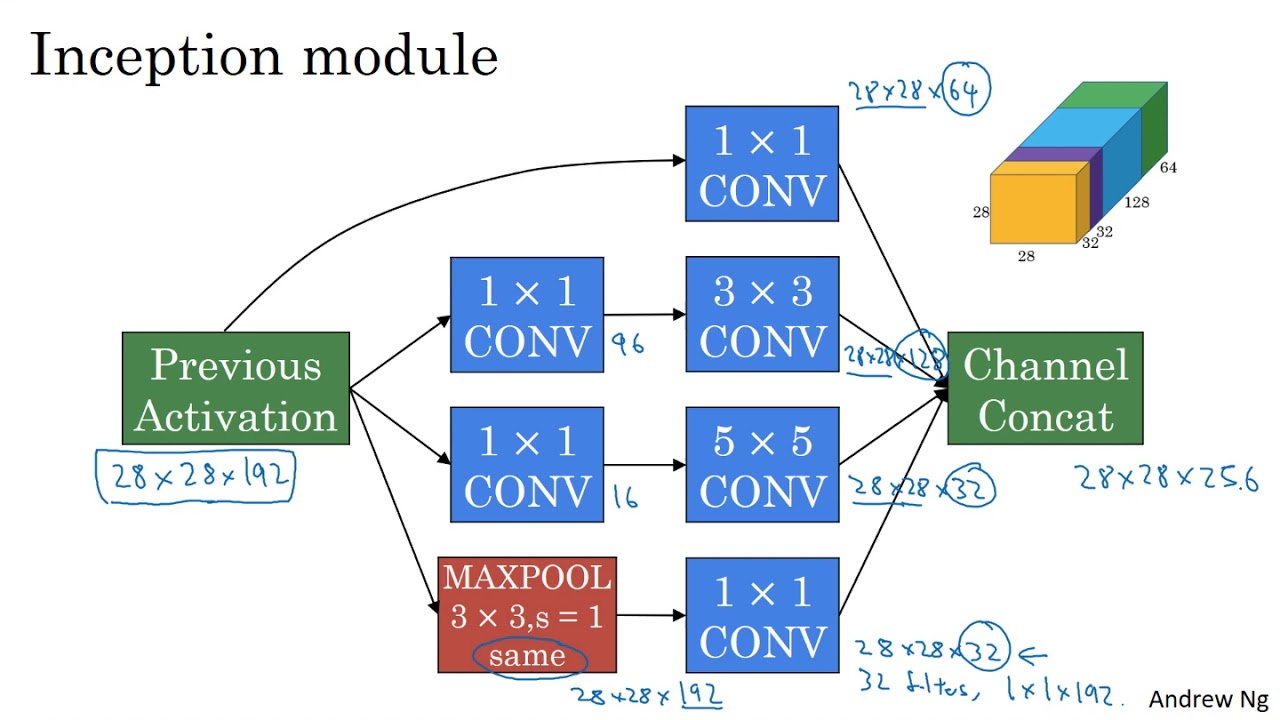


In [4]:
#Unit Function
def inception_module(x,cdim): # x = input ; cdim = concatenate dimension
  # <<< Branch I >>> 
  y1= layers.Conv2D(64,1,strides=(1,1),padding='same',activation='relu')(x)
  # <<< Branch II >>> 
  y2= layers.Conv2D(96,1,strides=(1,1),padding='same',activation='relu')(x)
  y2= layers.Conv2D(128,3,strides=(1,1),padding='same',activation='relu')(y2)
  # <<< Branch III >>> 
  y3= layers.Conv2D(16,1,strides=(1,1),padding='same',activation='relu')(x)
  y3= layers.Conv2D(32,5,strides=(1,1),padding='same',activation='relu')(y3)
  # <<< Branch IV >>>
  y4= layers.MaxPool2D(pool_size=(3 ,3),strides=1,padding='same')(x)
  y4= layers.Conv2D(32,1,strides=(1,1),padding='same',activation='relu')(y4)
  # Output = concatenate (tổ hợp theo chiều không gian cuối)
  x= layers.concatenate([y1,y2,y3,y4],axis=cdim)

  return x

Model: "inception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 28, 28, 192  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_79 (Conv2D)             (None, 28, 28, 96)   18528       ['input_12[0][0]']               
                                                                                                  
 conv2d_81 (Conv2D)             (None, 28, 28, 16)   3088        ['input_12[0][0]']               
                                                                                                  
 max_pooling2d_13 (MaxPooling2D  (None, 28, 28, 192)  0          ['input_12[0][0]']       

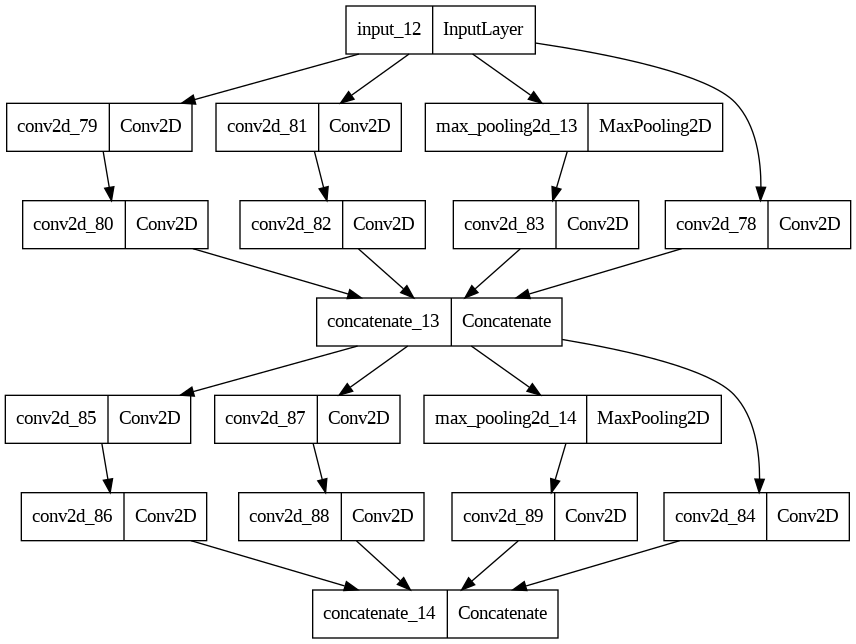

In [15]:
# example 28,28,192 (giống hình trên)
input = tf.keras.Input(shape=(28,28,192))
# inception_module input = input , concatenate dimension (chiều không gian cuối cùng = -1)
# Tổ hợp nhiều lớp lớp thứ I làm đầu vào cho lớp thứ 2
x= inception_module(input,-1)
# Output
output = inception_module(x,-1)
# Build model
model = tf.keras.Model(input,output,name='inception') # Name for model = inception
# show summary and draw graph
model.summary()
tf.keras.utils.plot_model(model,'ModelGG.png')